In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [13]:
df.columns

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1'],
      dtype='object')

In [14]:
# Convert to datetime
df['Datetime'] = pd.to_datetime(df['hour_beginning'])

/var/folders/m4/8tn_t7fn3n999rq0tn3djx1w0000gn/T/ipykernel_2906/498640071.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['hour_beginning'])


In [18]:
# Extract day name
df['DayOfWeek'] = df['Datetime'].dt.day_name()
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,Datetime,DayOfWeek
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2019-04-30 00:00:00,Tuesday
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2019-12-31 22:00:00,Tuesday
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2019-12-31 23:00:00,Tuesday
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2019-12-31 21:00:00,Tuesday
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2019-04-01 03:00:00,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2018-06-22 04:00:00,Friday
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2018-07-19 06:00:00,Thursday
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2018-06-16 16:00:00,Saturday
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2018-07-24 18:00:00,Tuesday


In [19]:
# Filter only Monday–Friday
weekday_df = df[df['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Group and sum pedestrian counts by weekday
weekday_counts = weekday_df.groupby('DayOfWeek')['Pedestrians'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
)

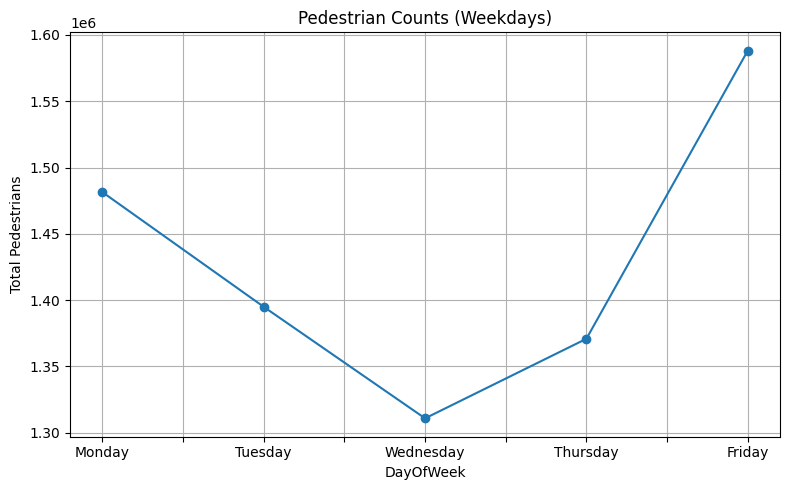

In [20]:
# Plot
weekday_counts.plot(kind='line', marker='o', figsize=(8, 5), title='Pedestrian Counts (Weekdays)')
plt.ylabel('Total Pedestrians')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Filter for 2019
df_2019 = df[df['Datetime'].dt.year == 2019]

# One-hot encode weather summary
weather_encoded = pd.get_dummies(df_2019['weather_summary'])

In [23]:
# Combine with Brooklyn Bridge count
df_weather = pd.concat([df_2019[['Brooklyn Bridge']], weather_encoded], axis=1)

# Correlation matrix
corr_matrix = df_weather.corr()

# Print correlations with pedestrian count
print(corr_matrix['Brooklyn Bridge'].sort_values(ascending=False))

# Optional heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Weather vs Pedestrian Counts Correlation (2019)')
plt.show()


KeyError: "None of [Index(['Brooklyn Bridge'], dtype='object')] are in the [columns]"